In [1]:
%run 4.2_AutoDL.ipynb

In [2]:
#Librairies
import joblib
from joblib import dump, load

#Tf & Keras
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip,RandomZoom,RandomWidth,Rescaling,RandomRotation
from tensorflow.keras.layers import RandomBrightness
from tensorflow.keras.applications import VGG19

## Application de la fonction principale de test_DL

In [14]:
#Choix des différentes variables de notre fonction test_DL

#chemin où sont stockées les images d'entrainement classées 
repertoire_train = get_output_path_folder("images_traitees_classe_train")

#chemin où sont stockées les images de test
repertoire_test = get_output_path_folder("images_traitees_classe_test")  ###Ajout FL pour les prédictions

#chemin où est stocké le dataFrame de suivi
chemin_df_score_DL = get_output_path_file("df_score_DL.joblib")

#Nos variables
image_size = (299,299)
batch_size = 30
epochs = 20
validation_split = 0.2
seed = 123

#DataAugmentation
data_augmentation = keras.Sequential([
   RandomFlip("horizontal",seed=123),     #Inversion horizontale aléatoire des images
   RandomZoom(height_factor=(-0.05, -0.15),width_factor=(-0.05, -0.15),seed=123), #Zoom aléatoire des images jusqu'à 15%
   RandomWidth(factor=(0.2, 0.3), interpolation='bilinear', seed=123), #ajustement aléatoire de la largeur d'un batch d'images par un facteur aléatoire
   RandomBrightness(factor =(0.1, 0.3), value_range=(0, 255), seed=123),#ajustement aléatoire de la luminosité d'images d'entrée RGB, différents facteurs par images d'un même batch
   RandomRotation(0.2)
])
# voir par exemple : https://www.tensorflow.org/tutorials/images/data_augmentation?hl=fr

#Notre modèle à tester, éventuellement une liste de modèles

#modèle pré entrainé
from tensorflow.keras.applications import Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
for layer in base_model.layers:
    layer.trainable = False  

#Instanciation dun modèle
model = Sequential()

#data_augmentation) et rescaling
model.add(data_augmentation)
model.add(Rescaling(1./255))

model.add(base_model)
model.add(GlobalAveragePooling2D()) 
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(27, activation='softmax'))
liste_modele=[model]

#les variables lors du .compile
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001)

optimizer=adam
loss='categorical_crossentropy'
metrics=['acc']

#nom fichier contrrôle
fichier_controle = 'modele_MobileNetV2_3'

#lancement de la fonction test_DL
df_score_DL = test_DL_predict(repertoire_train,repertoire_test,image_size,batch_size,validation_split,liste_modele,optimizer,loss,metrics,epochs,chemin_df_score_DL,fichier_controle)

#sauvegarde dans le même répertoire 
dump(df_score_DL,get_output_path_file("df_score_DL.joblib"))

Found 67931 files belonging to 27 classes.
Using 54345 files for training.
Found 67931 files belonging to 27 classes.
Using 13586 files for validation.
Found 16983 files belonging to 27 classes.
récupération du df existant
debut de l'entrainement du modèle 0
Epoch 1/20


60/60 [==============================] - ETA: 0s - loss: 3.1093 - acc: 0.1467
Epoch 1: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 360s 5s/step - loss: 3.1093 - acc: 0.1467 - val_loss: 2.7474 - val_acc: 0.2422 - lr: 0.0010
Epoch 2/20
60/60 [==============================] - ETA: 0s - loss: 2.7549 - acc: 0.2244
Epoch 2: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 290s 5s/step - loss: 2.7549 - acc: 0.2244 - val_loss: 2.4982 - val_acc: 0.3222 - lr: 0.0010
Epoch 3/20
60/60 [==============================] - ETA: 0s - loss: 2.6332 - acc: 0.2406
Epoch 3: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 284s 5s/step - loss: 2.6332 - acc: 0.2406 - val_loss: 2.3230 - val_acc: 0.3533 - lr: 0.0010
Epoch 4/20
60/60 [==============================] - ETA: 0s - loss: 2.5445 - acc: 0.2611
Epoch 4: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 291s 5s/step - loss: 2.5445 - acc: 0.2611 - val_loss: 2.2770 - val_acc: 0.3200 - lr: 0.0010
Epoch 5/20
60/60 [==============================] - ETA: 0s - loss: 2.5221 - acc: 0.2783
Epoch 5: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 317s 5s/step - loss: 2.5221 - acc: 0.2783 - val_loss: 2.3155 - val_acc: 0.3333 - lr: 0.0010
Epoch 6/20
60/60 [==============================] - ETA: 0s - loss: 2.4980 - acc: 0.2850
Epoch 6: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 291s 5s/step - loss: 2.4980 - acc: 0.2850 - val_loss: 2.2767 - val_acc: 0.3622 - lr: 0.0010
Epoch 7/20
60/60 [==============================] - ETA: 0s - loss: 2.4551 - acc: 0.2717
Epoch 7: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 263s 4s/step - loss: 2.4551 - acc: 0.2717 - val_loss: 2.2034 - val_acc: 0.3467 - lr: 0.0010
Epoch 8/20
60/60 [==============================] - ETA: 0s - loss: 2.4165 - acc: 0.3083
Epoch 8: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 263s 4s/step - loss: 2.4165 - acc: 0.3083 - val_loss: 2.3383 - val_acc: 0.3333 - lr: 0.0010
Epoch 9/20
60/60 [==============================] - ETA: 0s - loss: 2.3921 - acc: 0.3050
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 9: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 1479s 25s/step - loss: 2.3921 - acc: 0.3050 - val_loss: 2.2285 - val_acc: 0.3533 - lr: 0.0010
Epoch 10/20
60/60 [==============================] - ETA: 0s - loss: 2.3152 - acc: 0.3239
Epoch 10: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 332s 6s/step - loss: 2.3152 - acc: 0.3239 - val_loss: 2.1547 - val_acc: 0.3844 - lr: 1.0000e-04
Epoch 11/20
60/60 [==============================] - ETA: 0s - loss: 2.3349 - acc: 0.3333
Epoch 11: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 268s 5s/step - loss: 2.3349 - acc: 0.3333 - val_loss: 2.1619 - val_acc: 0.3778 - lr: 1.0000e-04
Epoch 12/20
60/60 [==============================] - ETA: 0s - loss: 2.2112 - acc: 0.3472
Epoch 12: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 283s 5s/step - loss: 2.2112 - acc: 0.3472 - val_loss: 2.1596 - val_acc: 0.3911 - lr: 1.0000e-04
Epoch 13/20
60/60 [==============================] - ETA: 0s - loss: 2.2812 - acc: 0.3367
Epoch 13: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 268s 5s/step - loss: 2.2812 - acc: 0.3367 - val_loss: 2.0745 - val_acc: 0.4044 - lr: 1.0000e-04
Epoch 14/20
60/60 [==============================] - ETA: 0s - loss: 2.2928 - acc: 0.3244
Epoch 14: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 250s 4s/step - loss: 2.2928 - acc: 0.3244 - val_loss: 2.0796 - val_acc: 0.3956 - lr: 1.0000e-04
Epoch 15/20
60/60 [==============================] - ETA: 0s - loss: 2.3702 - acc: 0.3189
Epoch 15: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 15: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 247s 4s/step - loss: 2.3702 - acc: 0.3189 - val_loss: 2.1304 - val_acc: 0.3889 - lr: 1.0000e-04
Epoch 16/20
60/60 [==============================] - ETA: 0s - loss: 2.2547 - acc: 0.3483Restoring model weights from the end of the best epoch: 13.

Epoch 16: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 251s 4s/step - loss: 2.2547 - acc: 0.3483 - val_loss: 2.0977 - val_acc: 0.3867 - lr: 1.0000e-05
Epoch 16: early stopping
fin de l'entrainement du modèle 0
567/567 [==============================] - 444s 783ms/step - loss: 2.0470 - acc: 0.3984
loss: 204.70%
acc: 39.84%


['C:\\Users\\xavie\\Documents\\GitHub\\AVR23_CDS_Rakuten\\notebooks\\df_score_DL.joblib']

In [3]:
#import pour vérification des résultats
df_score_DL = load(get_output_path_file("df_score_DL.joblib"))
df_score_DL.head()

,image_size,batch_size,model,epochs,optimizer,fonction loss,loss,acc,val_loss,val_acc,Duree_entrainement en sec,test_acc,Nom_fichier_contrôle
0,"(100, 100)",30,"[{'Layer Name': 'sequential_2'}, {'Layer Name'...",10,<keras.optimizers.optimizer_v2.adam.Adam objec...,categorical_crossentropy,"[3.1451005935668945, 3.0776517391204834, 3.083...","[0.12555555999279022, 0.125, 0.12777778506278992]","[3.125720739364624, 3.113123893737793, 3.07822...","[0.1111111119389534, 0.11777777969837189, 0.12...",173.060208,Non calculé,modele_simple3.h5
1,"(100, 100)",30,"[{'Layer Name': 'sequential_4'}, {'Layer Name'...",10,<keras.optimizers.optimizer_v2.adam.Adam objec...,categorical_crossentropy,"[3.145855665206909, 3.076969861984253, 3.08350...","[0.12555555999279022, 0.12444444745779037, 0.1...","[3.129887342453003, 3.1157567501068115, 3.0823...","[0.1111111119389534, 0.11777777969837189, 0.11...",460.016256,Non calculé,modele_simple4.h5
2,"(224, 224)",30,"[{'Layer Name': 'sequential_1'}, {'Layer Name'...",10,<keras.optimizers.optimizer_v2.adam.Adam objec...,categorical_crossentropy,"[3.281607151031494, 3.15097713470459, 3.143314...","[0.08722221851348877, 0.10222221910953522, 0.1...","[3.1874306201934814, 3.1801717281341553, 3.127...","[0.0533333346247673, 0.1133333370089531, 0.119...",2368.068408,Non calculé,modele_RESNet_1.h5
3,"(224, 224)",30,"[{'Layer Name': 'sequential_4'}, {'Layer Name'...",10,<keras.optimizers.optimizer_v2.adam.Adam objec...,categorical_crossentropy,"[2.951262950897217, 2.556007146835327, 2.41806...","[0.18388888239860535, 0.25833332538604736, 0.3...","[2.5368175506591797, 2.34822678565979, 2.17136...","[0.29777777194976807, 0.3199999928474426, 0.37...",1452.125535,"[1.9988242387771606, 0.4111758768558502]",modele_MobileNetV2_1.h5
4,"(224, 224)",30,"[{'Layer Name': 'sequential'}, {'Layer Name': ...",20,<keras.optimizers.optimizer_v2.adam.Adam objec...,categorical_crossentropy,"[2.9854161739349365, 2.558302164077759, 2.4249...","[0.16944444179534912, 0.26722222566604614, 0.2...","[2.6238224506378174, 2.3374409675598145, 2.185...","[0.25333333015441895, 0.324444442987442, 0.382...",2045.600172,"[2.005655288696289, 0.41253018379211426]",modele_MobileNetV2_2.h5


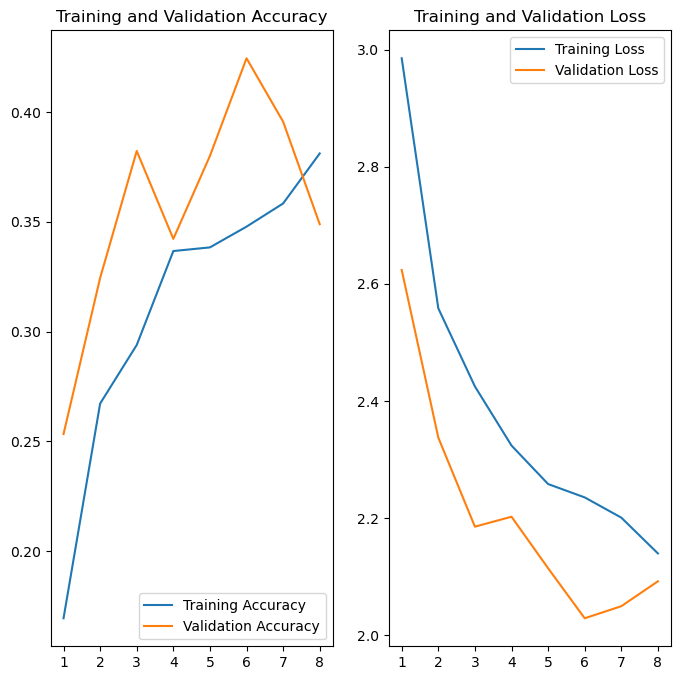

In [4]:
#application de la fonction de tracé
tracer_courbe_suivi("df_score_DL.joblib",4)